In [1]:
from skimage.io import imread
import pandas
from sklearn.cluster import KMeans
import numpy as np
from skimage import img_as_float
import pylab
import math
%matplotlib inline

1) Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

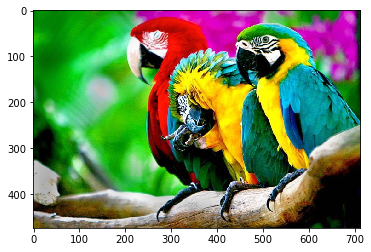

In [2]:
img = img_as_float(imread('data/parrots.jpg'))
pylab.imshow(img)

2) Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [3]:
pixels = pandas.DataFrame(np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2])), columns=['R', 'G', 'B'])

3) Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [4]:
model = KMeans(init='k-means++', random_state=241)
model.fit(pixels.loc[:,'R':'B'])
pixels['Cluster'] = model.predict(pixels.loc[:,'R':'B'])

means = pixels.groupby('Cluster').mean().values
mean_pixels = [means[x] for x in pixels['Cluster']]
mean_image = np.reshape(mean_pixels, (img.shape[0],img.shape[1],img.shape[2]))

medians = pixels.groupby('Cluster').median().values
median_pixels = [medians[x] for x in pixels['Cluster']]
median_image = np.reshape(median_pixels, (img.shape[0],img.shape[1],img.shape[2]))

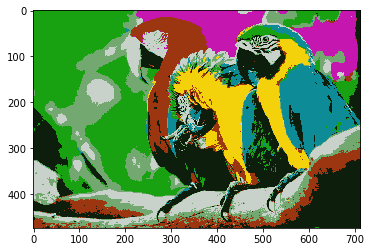

In [5]:
pylab.imshow(mean_image)

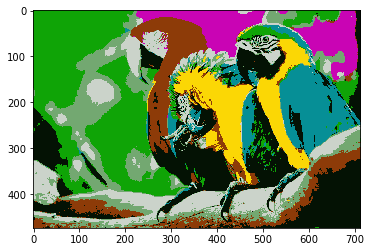

In [6]:
pylab.imshow(median_image)

4) Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно (см. определение).

In [7]:
psnr_median = 10 * math.log10(float(1) / np.mean((img - median_image) ** 2))
psnr_mean = 10 * math.log10(float(1) / np.mean((img - mean_image) ** 2))

5) Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

In [9]:
k = 0
for n_clusters in range (1,21):
    model = KMeans(n_clusters = n_clusters,init='k-means++', random_state=241)
    model.fit(pixels.loc[:,'R':'B'])
    pixels['Cluster'] = model.predict(pixels.loc[:,'R':'B'])

    means = pixels.groupby('Cluster').mean().values
    mean_pixels = [means[x] for x in pixels['Cluster']]
    mean_image = np.reshape(mean_pixels, (img.shape[0],img.shape[1],img.shape[2]))

    medians = pixels.groupby('Cluster').median().values
    median_pixels = [medians[x] for x in pixels['Cluster']]
    median_image = np.reshape(median_pixels, (img.shape[0],img.shape[1],img.shape[2]))
    
    psnr_median = 10 * math.log10(float(1) / np.mean((img - median_image) ** 2))
    psnr_mean = 10 * math.log10(float(1) / np.mean((img - mean_image) ** 2))
    
    if psnr_median > 20 or psnr_mean > 20:
        k = n_clusters
        break

In [10]:
k

11